## Loan Prediction Using selected Machine Learning Algorithms:
The term loan refers to a type of credit vehicle in which a sum of money is lent to another party in exchange for future repayment of the value or principal amount.In many cases, the lender also adds interest and/or finance charges to the principal value which the borrower must repay in addition to the principal balance.

## Dataset: Loan Prediction

## The Problem at Hand:
To develop a model that would correctly predict those who will default and result in a loan Charge Off.
Therefore, this is a supervised classification problem to be trained with algorithms like:
1-Logistic Regression
2-Decision Tree
3-Random Forest
4-Support Vector Machine
5-K-Nearest Neighboh

The choice of these algorithms is sequel upon the desire to keep the model very explanatory of itself.



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
# Data description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# We check for misssing values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Variable:Gender, Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History all have missing values.

In [8]:
# Firstly, we will fill the Missing Values that we notice in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [10]:
#Lets check again to confirm if there are any missing values in 'LoanAmount' & 'Credit_History'
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Next, Let's drop all the missing values remaining.
df.dropna(inplace=True)


In [12]:
# finally,Let's check for the Missing values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# Now, Let's view the final Dataset Shape
df.shape

(542, 13)

## Exploratory Data Analysis:
Exploratory Data Analysis refers to the critical process of performing initial investigations on  data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.It is all about making sense of data in hand,before getting them dirty with it.We shall be deploying it in our dataset analysis.

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


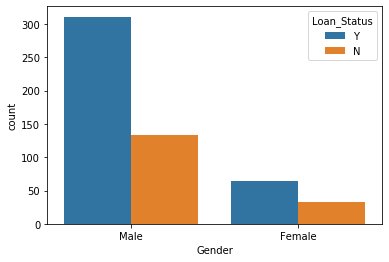

In [14]:
# Gender status
sns.countplot(df['Gender'],hue=df['Loan_Status'])
print(pd.crosstab(df['Gender'],df['Loan_Status']))

# From above, we can see that more males are on loan than females. Also, those that are on loan are more than otherwise.


Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


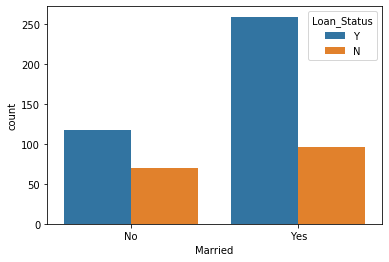

In [15]:
#lets do a comparison between Married and unmarried in getting the Loan
sns.countplot(df['Married'],hue=df['Loan_Status'])
print(pd.crosstab(df['Married'],df['Loan_Status']))

# We can also see from above that married people collect more loan than unmarried people.

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


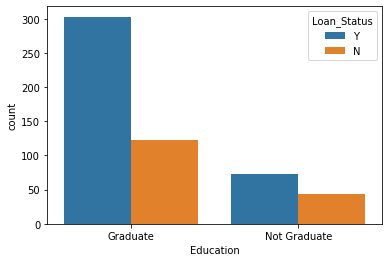

In [16]:
# lets do another Comparison between Education Status of an Individual in getting the Loan
sns.countplot(df['Education'],hue=df['Loan_Status'])
print(pd.crosstab(df['Education'],df['Loan_Status']))

# Here we can see that a Graduate Individual collects more Loan than a Not-Graduate individual .

Loan_Status      N    Y
row_0                  
Property_Area  166  376


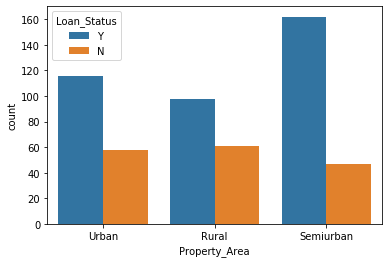

In [17]:
# Lets also do a Comparison between Property Area for getting the Loan
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
print(pd.crosstab(['Property_Area'],df['Loan_Status']))

# Semiurban obtain more loan, followed by Urban and then rural. This is logical.

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


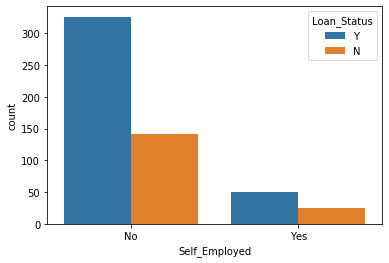

In [19]:
# Lets do a comparison between Self-Employed or Not Self-Employed in getting the Loan
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

# From above, It shows that the category of those that take loans is less of self-employed people. That is, those that are not self-employed, probably salary earners obtain more loans.

In [20]:
# We will now replace the Variable values to Numerical form & display the Value Counts
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [21]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [22]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [25]:
df.Married=df.Married.map({'Yes':1,'No':2})
df['Married'].value_counts()

1    355
2    187
Name: Married, dtype: int64

In [26]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [27]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [28]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [29]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [30]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [31]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

## Correlation Matrix Heatmap

Text(0.5, 1, 'Correlation Matrix (for Loan Status)')

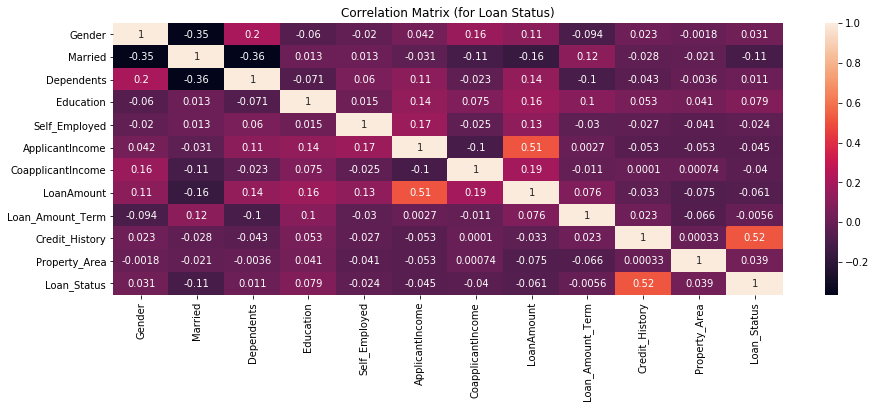

In [33]:
# We will display the Correlation Matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

# Heatmap: Showing the correlations of features with the target. 
No correlations are extremely high. The correlations between LoanAmount and ApplicantIncome can be explained.Also,from the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable),Which denotes that the Loan_Status is heavily dependent on the Credit_History.



In [35]:
# Final DataFrame
df.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,2,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1


In [48]:
# Importing Packages for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Encoding to numeric data;
code_numeric = {‘Male’: 1, ‘Female’: 2,
‘Yes’: 1, ‘No’: 2,
‘Graduate’: 1, ‘Not Graduate’: 2,
‘Urban’: 3, ‘Semiurban’: 2,’Rural’: 1,
‘Y’: 1, ’N’: 0,
‘3+’: 3}

In [37]:
# We split the data for training
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [39]:
print(X_train)

[[  1.   2.   2. ... 360.   1.   1.]
 [  1.   2.   3. ... 360.   1.   0.]
 [  0.   2.   1. ... 360.   1.   0.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  1.   1.   3. ... 360.   0.   0.]
 [  0.   1.   2. ... 360.   1.   1.]]


In [40]:
print(X_test)

[[  0.   1.   2. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   0.   0.]
 [  1.   2.   0. ... 360.   0.   0.]
 ...
 [  1.   1.   3. ... 180.   1.   0.]
 [  0.   1.   1. ... 360.   1.   1.]
 [  1.   1.   2. ... 360.   1.   2.]]


In [41]:
print(y_train)

[1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1]


In [42]:
print(y_test)

[0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1]


## Logistic Regression:
Logistic Regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal,ordinal,interval or ratio-level independent variables.It is used when the dependent variable(target) is categorical.Linear regression is not suitable for classification problem.


In [43]:
# Using Logistic Regression
model = LogisticRegression()

In [44]:
model.fit(X_train,y_train)

C:\Users\VP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
ypred = model.predict(X_test)
print(ypred)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [50]:
evaluation = f1_score(y_test, ypred)
evaluation

0.830188679245283

## Support Vector Machine(SVM):
The Support Vector Machine is a simple,flexible yet elegant and powerful algorithm.It can be used for both regression and classification tasks.The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane(MMH).The advantage of using SVM classifiers is that it offers great accuracy and works well with high dimensional space.It also use a subset of training points hence it uses very less memory. 


In [55]:
# Using Support Vector Machine(SVM)
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.6238532110091743


## Random Forest Classifier:
Random forest classifier is a flexible easy-to-use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time.It is also one of the most used algorithms,because of its simplicity and diversity. It creates a set of decision trees from randomly selected subset of training set.It then aggregates the votes from different decision trees to decide the final class of the test object. Random Forest Classifier being ensembled algorithm(Ensenbled algorithms combines more than one algorithms of same or different kind for classifying objects) tends to give more accurate result because it works on principle.Put simply: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Advantages of the Random Forest Classifier include; that random forest is versatile.It can be used for both regression and claasification tasks,and it's also easy to view the relative importance it assigns to the input features.It is also a very handy algorithm because the default hyperparameters is very pretty straightforward. 


In [56]:
# Using RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [58]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8227848101265822

## Desion Tree Algorithm:
A Decision Tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs and utility.It can also be used to estimate the value of a continuous target variable. The target variable is usually categorical and the decision tree is used to calculate the probability that a given record belong to each of the category or to classify the record by assigning it to the most likely class.It is one of the more popular classification algoritms  used in Data Mining and Machine Learning. Some of the advantage of using Decsion Tree include; that it is easy to understand especially for me that have little or no analytical background as it does not require any statistical knowledge to read and interprete them.It is useful in data exploration. The number of hyper-parameters to be tuned is almost null.

In [59]:
# Using DecisionTree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1]


In [63]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.7692307692307693

## K-Nearest Neighbors (KNN) Algorithm:
The K-Nearest Neighbors(KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximty.Simply put, similar things are near to each other.
Some of the major advantages of using the KNN algorithm include; that it is simple and easy to implement,The algorithm is versatile as it can be used for classification, regression and search.Also, with KNN algorithm, there is no need to build a model,tune several parameters, or make additional assumptions.

In [64]:
# Using K-Nearest Neighbors (KNN)
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.5871559633027523


## Conclusion:
From the Exploratory Data Analysis, we have being able to generate insight about the data.
We can say that Loan Status is heavily dependent on Credit History for predictions.
We have seen how each features relates to the target.
Also, from the above evaluation, it can be seen that of all the models employed for the analysis, Logistic Regression Algorithm(LRA) performed far better(83%) than others.
Random Forest Classifier(RFC) did better than Decision Tree Classifier(DTC). Support Vector Machine(SVM) also did bettter than K-Nearest Neighbors(KNN).

    